In [26]:
import numpy as np

from scvi.dataset import union, GeneExpressionDataset, Dataset10X, UnionDataset, EbiData
from scvi.inference import UnsupervisedTrainer
from scvi.models import VAE, SCANVI, VAEC
import matplotlib.pyplot as plt
import matplotlib
import torch
import os
import pandas as pd
import matplotlib as mpl

import copy
import time

In [2]:
data_full = EbiData("./data", experiment="E-ENAD-15")
data_big = UnionDataset("./data", map_fname="ensembl_mouse_genes-proteincoding", low_memory=False)
data_big.concat_union_from_memory([data_full])
data_big.filter_cell_types(np.array([ct for ct in data_big.cell_types if ct != "not available"]))

/home/michael/GitHub/scVI_ma/scvi/dataset/ebidata.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  adata.obs["batch_indices"][adata.obs["batch_indices"] == barcode] = i
[2019-08-07 14:19:19,717] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,724] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,731] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,735] WARNING - scvi.dataset.dataset | This dataset has some empty 

[2019-08-07 14:19:19,956] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,961] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,964] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,973] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,981] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:19,986] WARNING - scvi.dataset.d

[2019-08-07 14:19:20,248] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,254] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,260] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,263] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,269] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,273] WARNING - scvi.dataset.d

[2019-08-07 14:19:20,484] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,488] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,492] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,503] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,510] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,518] WARNING - scvi.dataset.d

[2019-08-07 14:19:20,683] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,689] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,693] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,697] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,703] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,705] WARNING - scvi.dataset.d

[2019-08-07 14:19:20,831] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,832] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,835] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,840] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,842] WARNING - scvi.dataset.dataset | This dataset has some empty cells, this might fail scVI inference.Data should be filtered with `my_dataset.filter_cells_by_count()
[2019-08-07 14:19:20,844] WARNING - scvi.dataset.d

In [3]:
data_big.batch_indices

array([[  0],
       [  1],
       [  2],
       ...,
       [221],
       [194],
       [195]], dtype=uint16)

In [58]:
%matplotlib inline
sizes = data_full.obs.groupby(by=["Sample Characteristic[organism part]", "cell_types"]).size()
# sizes["bone marrow"].sum()
for tissue in pd.unique(sizes.index.get_level_values(0)):
    sizes[(tissue, "TOTAL")] = sizes[tissue].sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(sizes, sep="\n")


aorta
ascending colon
back skin
bone marrow
cerebellum
cerebral cortex
descending colon
diaphragm
endocrine pancreas
exocrine pancreas
gonadal fat pad
heart
heart left atrium
heart left atrium and heart right atrium
heart left ventricle
heart right atrium
heart right ventricle
hippocampus
interscapular brown adipose tissue
kidney
limb muscle
liver
lung
mammary gland
mesenteric adipose tissue
spleen
striatum
subcutaneous adipose tissue
thymus
tongue
trachea
urinary bladder
Sample Characteristic[organism part]      cell_types                                        
aorta                                     endothelial cell                                       188
                                          erythrocyte                                             91
                                          fibroblast                                              70
                                          not available                                          694
                          

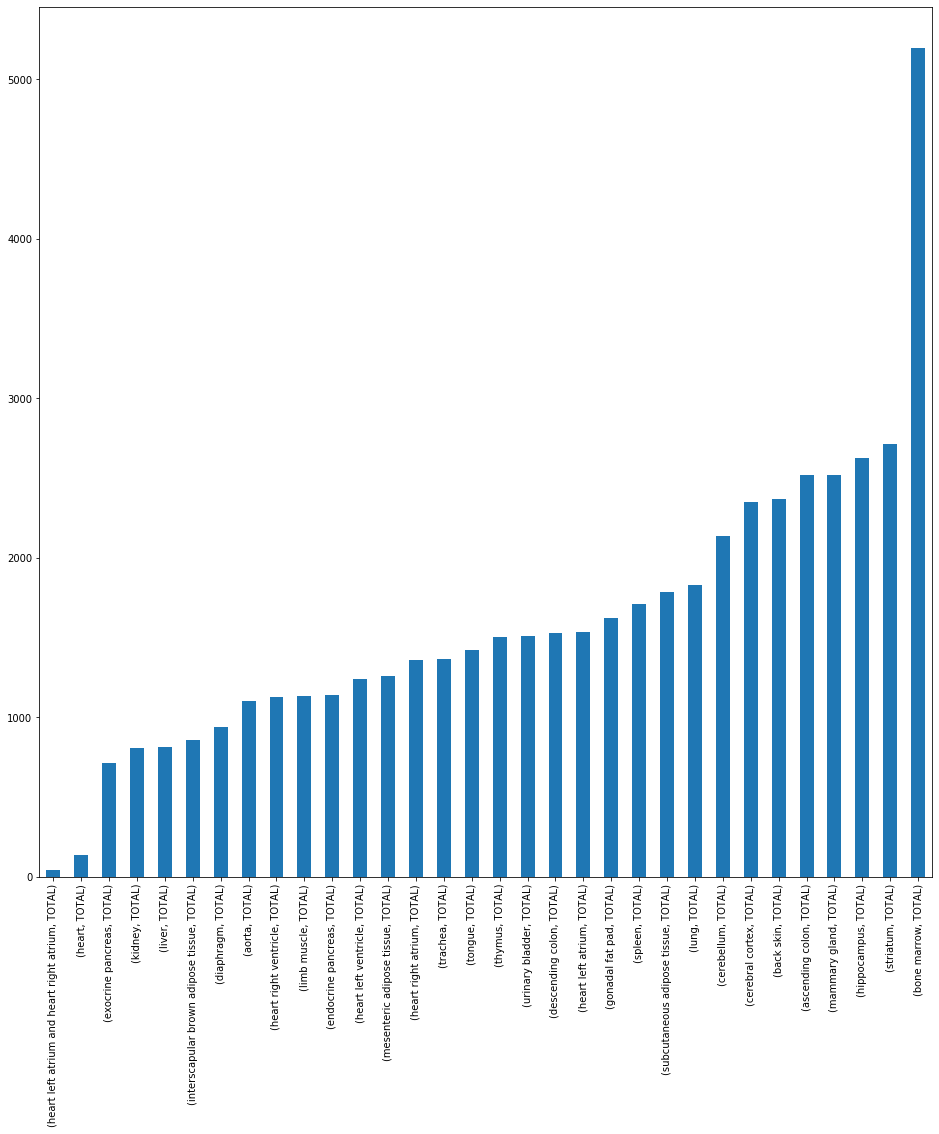

In [57]:
barplot,index = [], []
for tissue in pd.unique(sizes.index.get_level_values(0)):
        barplot.append(sizes[(tissue, "TOTAL")])
        index.append((tissue, "TOTAL"))
barplot = pd.Series(barplot, index=index)
barplot.sort_values().plot.bar(figsize=(16,16))